In [1]:
import geopandas as gp
import pandas as pd
import contextily as cx

# Alabama Voterfile Work

- The purpose of this notebook is to use the voterfile to create the ~60 precinct geometries for the 2022 election result precincts that had no good match in the 2020 VEST file

Maps:
- Shelby, need to use map
- Jefferson, using map / shapefile

Not Sure Yet:
- Marion (3 precincts), vf precincts only have numbers, more vf precincts than election results
- Tallapoosa (2 precincts), vf precincts only have numbers, more vf precincts than election results


- Mobile: Also map available
- Madison Also map available
- Baldwin Also map available
- DONE ~Marshall ~
- DONE ~131       Wilcox         2~ #Note: don't feel great about it
- DONE ~127       Walker         2~ #Note: left out 2 precincts we seem to only correspond to one in VF
- DONE ~099       Monroe         2~
- DONE ~019       Cherokee       2~
- DONE ~031       Coffee         1~
- DONE ~047       Dallas         5~
- DONE ~013       Butler         2~
- DONE ~043       Cullman        2~
- DONE ~011       Bullock        4~
- DONE ~001       Autauga        3~
- DONE ~109       Pike           1~
- DONE ~125       Tuscaloosa     1~

Madison - could probably use map
Bullock - a lot of precincts closed

In [144]:
vest_al = gp.read_file("./raw-from-source/al_vest_20/al_vest_20.shp")
vest_al["UNIQUE_ID"] = vest_al["COUNTYFP20"].astype(int).astype(str)+"-"+vest_al["NAME20"]
vest_al = vest_al.to_crs("EPSG:4326")

In [145]:
vf_correspondence = pd.read_csv("./starting_vf_matches.csv")

In [146]:
join_after_first_step = gp.read_file("./first_round_joins/first_round_joins.shp")

In [147]:
join_after_first_step[join_after_first_step["_merge"]=="right_only"]["COUNTYFP20"].value_counts()

117    14
097     4
089     3
031     3
003     2
057     2
013     1
045     1
091     1
015     1
Name: COUNTYFP20, dtype: int64

In [148]:
join_after_first_step[join_after_first_step["_merge"]=="left_only"][["COUNTYFP","County"]].value_counts()

COUNTYFP  County   
117.0     Shelby       8
73.0      Jefferson    7
89.0      Madison      5
3.0       Baldwin      4
dtype: int64

In [149]:
vest_unjoined = list(join_after_first_step[join_after_first_step["_merge"]=="right_only"]["UNIQUE_ID"])

In [ ]:
[vest_unjoined]

Shelby, Jefferson, Madison, Baldwin
"117", "073", "089", "003"

In [194]:
vest_unjoined = ['13-Monterey School House',
 '31-Chestnut Grove',
 '31-Victoria Baptist',
 '45-Rocky Head Ft Rucker',
 '31-Unassigned',
 '89-Cove Church at Chase',
 '91-Demopolis National Guard',
 '15-Donoho School',
 '57-Sugar Creek',
 '57-Cole Killingsworth',
 '97-Grace UMC',
 '97-Volunteers of America',
 '97-Whistler UMC',
 '97-Apostolic Church of God']

In [151]:
unjoined_precincts = join_after_first_step[join_after_first_step["_merge"]=="left_only"].copy(deep = True)

In [156]:
other_way_need = unjoined_precincts[unjoined_precincts["County"].isin(["Jefferson","Shelby","Madison","Baldwin"])].copy(deep = True)

In [157]:
other_way_need["UNIQUE_ID"].values

array(['Jefferson-:-PREC 3075 - FIRST BAPTIST CHUR',
       'Jefferson-:-PREC 4005 - GARDENDALE FIRST B',
       'Jefferson-:-PREC 4025 - TRUSSVILLE CIVIC C',
       'Jefferson-:-PREC 4045 - FAITH COMMUNITY FE',
       'Jefferson-:-PREC 5005 - BIRMINGHAM FIRST S',
       'Jefferson-:-PREC 5015 - HOOVER SENIOR CENT',
       'Jefferson-:-PREC 3045 - BIRMINGHAM COMMUNI',
       'Baldwin-:-HARRIETT COCKRELL CTR', 'Baldwin-:-HOMESTEAD VILLAGE',
       'Baldwin-:-ST_ MARGARET SCOTLAND',
       "Baldwin-:-ST_ PAUL'S EPISCOPAL", 'Shelby-:-CHURCH AT CAHABA BEND',
       'Shelby-:-FOUNDERS CLUBHOUSE', 'Shelby-:-HOPE MOUNTAIN CH',
       'Shelby-:-OLD MILL SQUARE', 'Shelby-:-SHELBY CO_ SERVICES BLDG_',
       'Shelby-:-SOUTH SHELBY BAPT_ CH', 'Shelby-:-WESTWOOD BAPTIST CH',
       'Shelby-:-WILSONVILLE UMC', 'Madison-:-CORNERSTONE PRESBYTERIAN',
       'Madison-:-HOUSE OF HOPE & REST CH',
       'Madison-:-INDIAN CREEK PRIM BAPT',
       'Madison-:-MADISON CROSS RD COMM CTR', 'Madison-:-MOVEMENT 

In [158]:
creating_prec_using_vf = unjoined_precincts[~unjoined_precincts["County"].isin(["Jefferson","Shelby","Marion","Tallapoosa"])].copy(deep = True)

In [159]:
ones_to_make = list(creating_prec_using_vf["UNIQUE_ID"].unique())

In [160]:
creating_prec_using_vf

UNIQUE_ID  COUNTYFP   County  \
1162      Baldwin-:-HARRIETT COCKRELL CTR       3.0  Baldwin   
1163          Baldwin-:-HOMESTEAD VILLAGE       3.0  Baldwin   
1184      Baldwin-:-ST_ MARGARET SCOTLAND       3.0  Baldwin   
1185       Baldwin-:-ST_ PAUL'S EPISCOPAL       3.0  Baldwin   
1812   Madison-:-CORNERSTONE PRESBYTERIAN      89.0  Madison   
1826    Madison-:-HOUSE OF HOPE & REST CH      89.0  Madison   
1827     Madison-:-INDIAN CREEK PRIM BAPT      89.0  Madison   
1837  Madison-:-MADISON CROSS RD COMM CTR      89.0  Madison   
1846                Madison-:-MOVEMENT CH      89.0  Madison   

                       Precinct  G22AJ5DKEL  G22AJ5RCOO  G22AJ5OWRI  \
1162      HARRIETT COCKRELL CTR        45.0       569.0         1.0   
1163          HOMESTEAD VILLAGE       304.0       951.0         3.0   
1184      ST_ MARGARET SCOTLAND       323.0      1572.0         1.0   
1185       ST_ PAUL'S EPISCOPAL       482.0      1262.0         8.0   
1812   CORNERSTONE PRESBYTERIAN       452.0       588.0         1.0   
1826    HOUSE OF HOPE & REST CH       976.0        97.0         1.0   
1827     INDIAN CREEK PRIM BAPT       984.0      1290.0         2.0   
1837  MADISON CROSS RD COMM CTR       210.0       963.0         0.0   
1846                MOVEMENT CH       374.0       496.0         0.0   

      G22AJ6RWIS  G22AJ6OWRI  G22ATGRMAR  ...  G20SACOWR2  G20SCCRWIN  \
1162       581.0         3.0       576.0  ...         NaN         NaN   
1163      1003.0        29.0       970.0  ...         NaN         NaN   
1184      1636.0        17.0      1587.0  ...         NaN         NaN   
1185      1351.0        34.0      1278.0  ...         NaN         NaN   
1812       666.0        31.0       609.0  ...         NaN         NaN   
1826       193.0        60.0        98.0  ...         NaN         NaN   
1827      1469.0        60.0      1308.0  ...         NaN         NaN   
1837       979.0        16.0       974.0  ...         NaN         NaN   
1846       566.0        27.0       507.0  ...         NaN         NaN   

      G20SCCOWRI  G20SCCRKEL  G20SCCOWR2  G20PSCRCAV  G20PSCDCAS  G20PSCOWRI  \
1162         NaN         NaN         NaN         NaN         NaN         NaN   
1163         NaN         NaN         NaN         NaN         NaN         NaN   
1184         NaN         NaN         NaN         NaN         NaN         NaN   
1185         NaN         NaN         NaN         NaN         NaN         NaN   
1812         NaN         NaN         NaN         NaN         NaN         NaN   
1826         NaN         NaN         NaN         NaN         NaN         NaN   
1827         NaN         NaN         NaN         NaN         NaN         NaN   
1837         NaN         NaN         NaN         NaN         NaN         NaN   
1846         NaN         NaN         NaN         NaN         NaN         NaN   

         _merge  geometry  
1162  left_only      None  
1163  left_only      None  
1184  left_only      None  
1185  left_only      None  
1812  left_only      None  
1826  left_only      None  
1827  left_only      None  
1837  left_only      None  
1846  left_only      None  

[9 rows x 471 columns]

In [161]:
def make_vf_points(vf):
    vf['lat'] = vf['lat'].astype(float)
    vf['lon'] = vf['lon'].astype(float)
    points = gp.GeoDataFrame(vf,geometry = gp.points_from_xy(vf.lon, vf.lat, crs='EPSG:4326'))
    assert(len(vf)==len(points))
    return points

holder = pd.read_csv("/Users/peterhorton/Downloads/AL_individual_file000.gz")
holder["UNIQUE_ID"] = holder["co_fips"].astype(str).str.zfill(3)+"-"+holder["precinct"]
holder["UNIQUE_ID"] = holder["UNIQUE_ID"].str.strip()
holder = holder[(holder["gen_vote"]=="Y")]
holder["Count"] = 1
holder = make_vf_points(holder)

In [164]:
ones_to_make.sort()
vest_unjoined.sort()

In [165]:
ones_to_make

['Baldwin-:-HARRIETT COCKRELL CTR',
 'Baldwin-:-HOMESTEAD VILLAGE',
 'Baldwin-:-ST_ MARGARET SCOTLAND',
 "Baldwin-:-ST_ PAUL'S EPISCOPAL",
 'Madison-:-CORNERSTONE PRESBYTERIAN',
 'Madison-:-HOUSE OF HOPE & REST CH',
 'Madison-:-INDIAN CREEK PRIM BAPT',
 'Madison-:-MADISON CROSS RD COMM CTR',
 'Madison-:-MOVEMENT CH']

In [166]:
vest_unjoined

['117-1st Presbyterian',
 '117-Alabaster Liberty Baptist',
 '117-Bay Springs Baptist',
 '117-Blackwatch Sports',
 '117-Camp Branch Civic Ctr',
 '117-Columbiana Rec Bldg',
 '117-Concord Baptist',
 '117-Fourmile VFD',
 '117-Hoover Fire St #8',
 '117-Montevallo Parks & Rec',
 '117-Pelham Park Rec Ctr',
 '117-Shelby Iron Works Park',
 '117-Southcrest Baptist',
 '117-Wilsonville UMC',
 '13-Monterey School House',
 '15-Donoho School',
 '3-Ellisville Comm Ctr',
 '3-Old Vaughn School',
 '31-Chestnut Grove',
 '31-Unassigned',
 '31-Victoria Baptist',
 '45-Rocky Head Ft Rucker',
 '57-Cole Killingsworth',
 '57-Sugar Creek',
 '89-Cove Church at Chase',
 '89-New Shiloh Church',
 '89-Pleasant Springs Baptist',
 '91-Demopolis National Guard',
 '97-Apostolic Church of God',
 '97-Grace UMC',
 '97-Volunteers of America',
 '97-Whistler UMC']

In [167]:
vf_ids = list(vf_correspondence.loc[vf_correspondence["ELEC_22_ID"]=="Marshall-:-C & C ASPHALT","VF_ID"].values)


In [168]:
vf_correspondence.loc[vf_correspondence["ELEC_22_ID"]=="Marshall-:-C & C ASPHALT"]

VF_ID                ELEC_22_ID
892  095-0031-GUNTERSVILLE REC CENTER  Marshall-:-C & C ASPHALT

In [169]:
holder[holder["UNIQUE_ID"]=='095-0031-GUNTERSVILLE REC CENTER']["geoid20"].unique()

array(['010950306023021', '010950306022028', '010950306023023',
       '010950306023024', '010950306023026', '010950306023025',
       '010950306023027', '010950306023031', '010950306023028',
       '010950306023022'], dtype=object)

Baldwin-:-HARRIETT COCKRELL CTR


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():



Baldwin-:-HOMESTEAD VILLAGE


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():



Baldwin-:-ST_ MARGARET SCOTLAND


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():



Baldwin-:-ST_ PAUL'S EPISCOPAL


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():



Madison-:-CORNERSTONE PRESBYTERIAN


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():



Madison-:-HOUSE OF HOPE & REST CH


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():



Madison-:-INDIAN CREEK PRIM BAPT


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():



Madison-:-MADISON CROSS RD COMM CTR


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():



Madison-:-MOVEMENT CH


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():


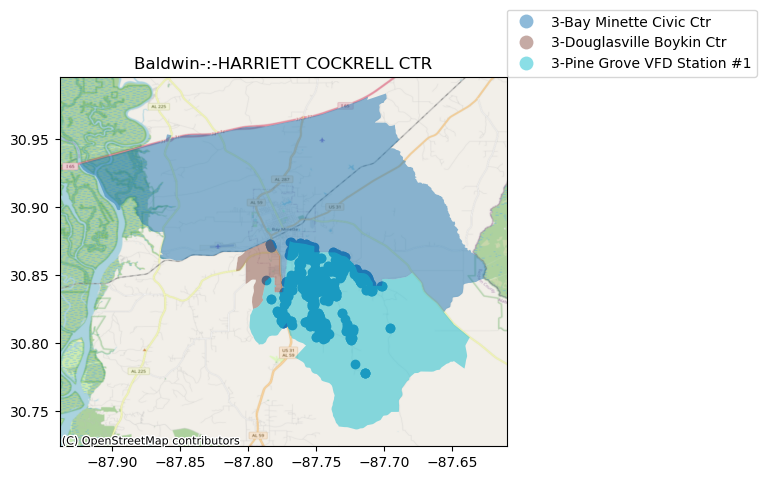

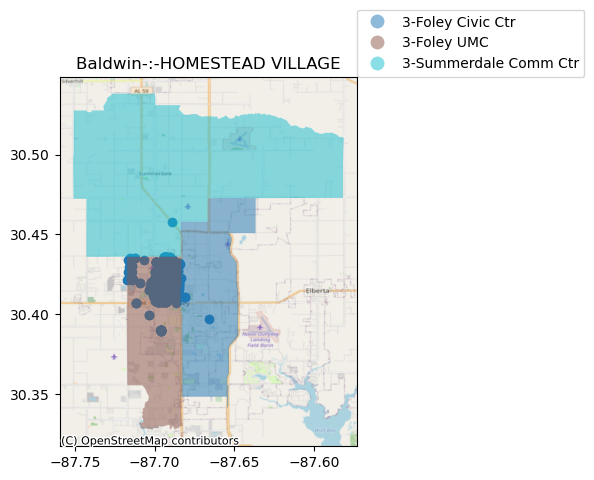

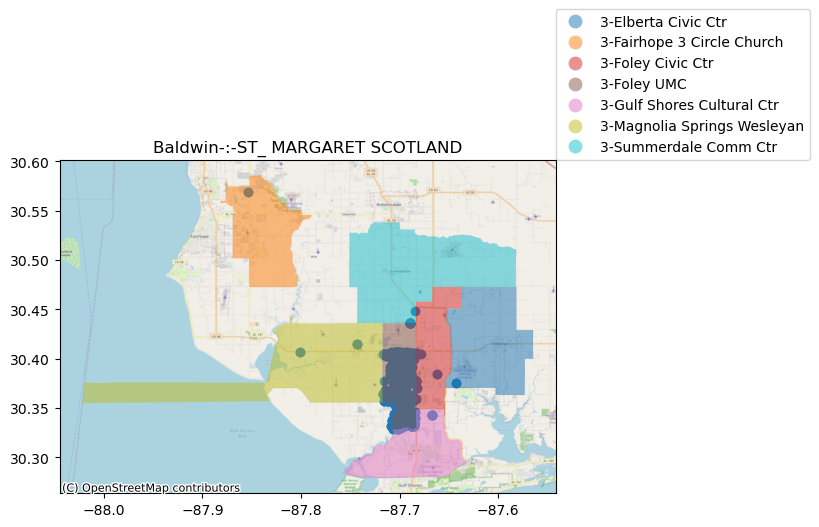

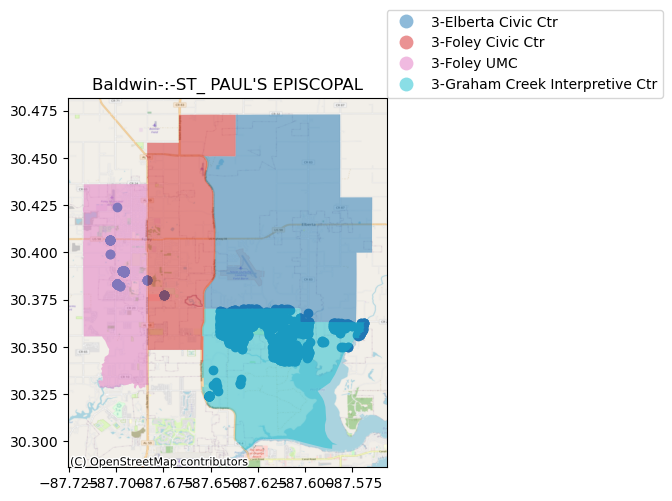

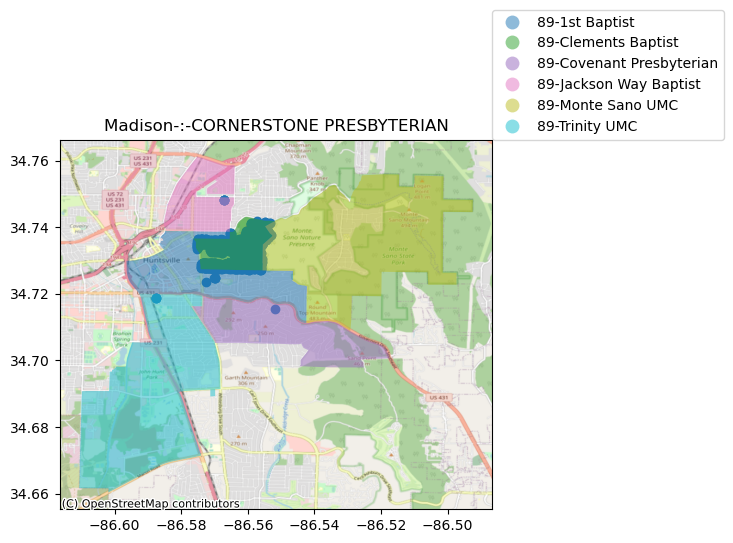

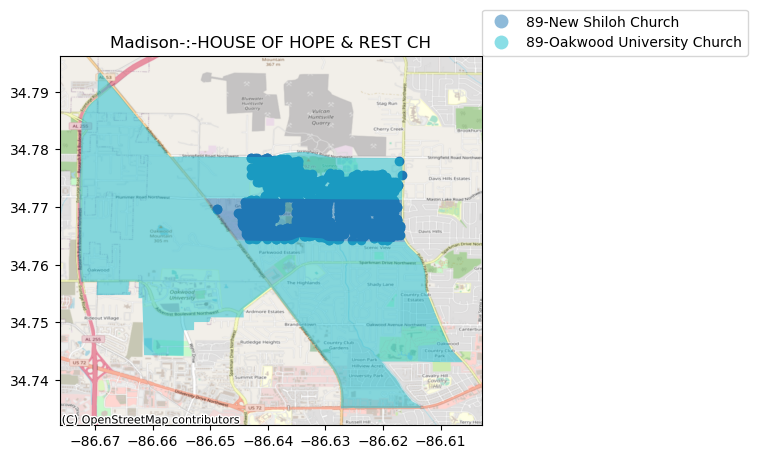

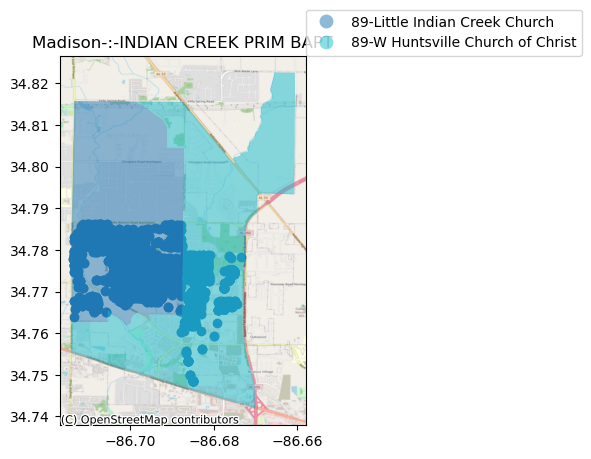

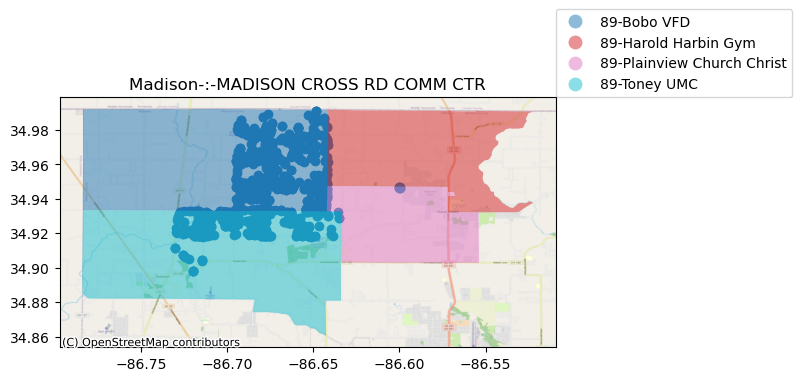

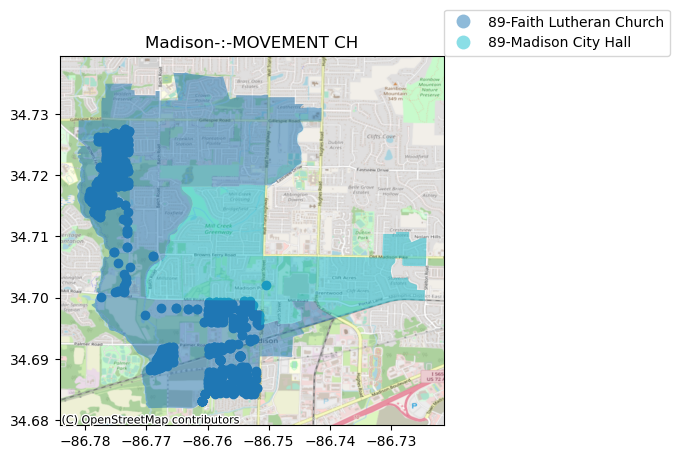

In [170]:
for prec in ones_to_make:
    print(prec)
    vf_ids = list(vf_correspondence.loc[vf_correspondence["ELEC_22_ID"]==prec,"VF_ID"].values)
    
    extent = holder[holder["UNIQUE_ID"].isin(vf_ids)]
    
    intersection = gp.overlay(extent, vest_al, how = "intersection")
    print()
    
    ax = extent.plot()
    
    xlim = ([extent.total_bounds[0],  extent.total_bounds[2]])
    ylim = ([extent.total_bounds[1],  extent.total_bounds[3]])

#     ax.set_xlim(xlim)
#     ax.set_ylim(ylim)
    
    vest_al[vest_al["UNIQUE_ID"].isin(list(intersection["UNIQUE_ID_2"].unique()))].plot(column = "UNIQUE_ID", ax = ax, alpha = .5, legend = True, legend_kwds={"loc":(1,1)})
    
    cx.add_basemap(ax = ax, crs = vest_al.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
    
    ax.set_title(prec)
    


<AxesSubplot: >

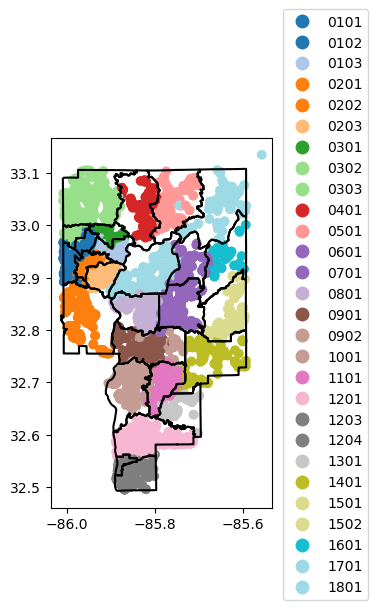

In [171]:
ax = holder[holder["co_fips"]==123].plot(column = "precinct",legend = True, cmap = "tab20", legend_kwds = {"loc":(1.05,-.25)})
vest_al[vest_al["COUNTYFP20"]=="123"].boundary.plot(ax = ax, color = "black")

<AxesSubplot: >

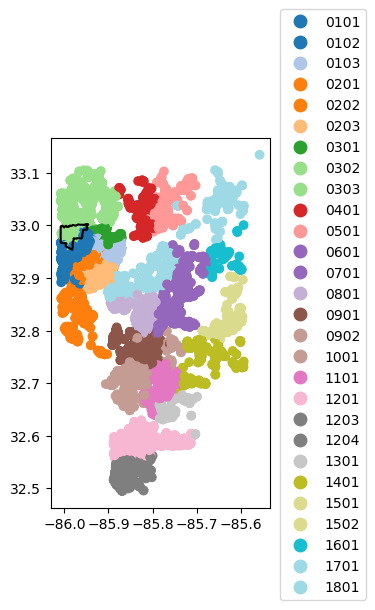

In [172]:
ax = holder[holder["co_fips"]==123].plot(column = "precinct",legend = True, cmap = "tab20", legend_kwds = {"loc":(1.05,-.25)})
vest_al[vest_al["UNIQUE_ID"].isin([
 "123-Moncrief's Store"])].boundary.plot(ax = ax, color = "black")


In [173]:
vest_al[vest_al["UNIQUE_ID"].isin(["123-Tallassee City Hall"])]

STATEFP20 COUNTYFP20 VTDST20      GEOID20               NAME20  \
1936        01        123  001203  01123001203  Tallassee City Hall   

      G20PRERTRU  G20PREDBID  G20PRELJOR  G20PREOWRI  G20USSRTUB  ...  \
1936         550         143           6           1         527  ...   

      G20SACOWR2  G20SCCRWIN  G20SCCOWRI  G20SCCRKEL  G20SCCOWR2  G20PSCRCAV  \
1936           8         586           8         583           7         526   

      G20PSCDCAS  G20PSCOWRI  \
1936         164           0   

                                               geometry  \
1936  POLYGON ((-85.88856 32.52246, -85.89047 32.522...   

                    UNIQUE_ID  
1936  123-Tallassee City Hall  

[1 rows x 29 columns]

<AxesSubplot: >

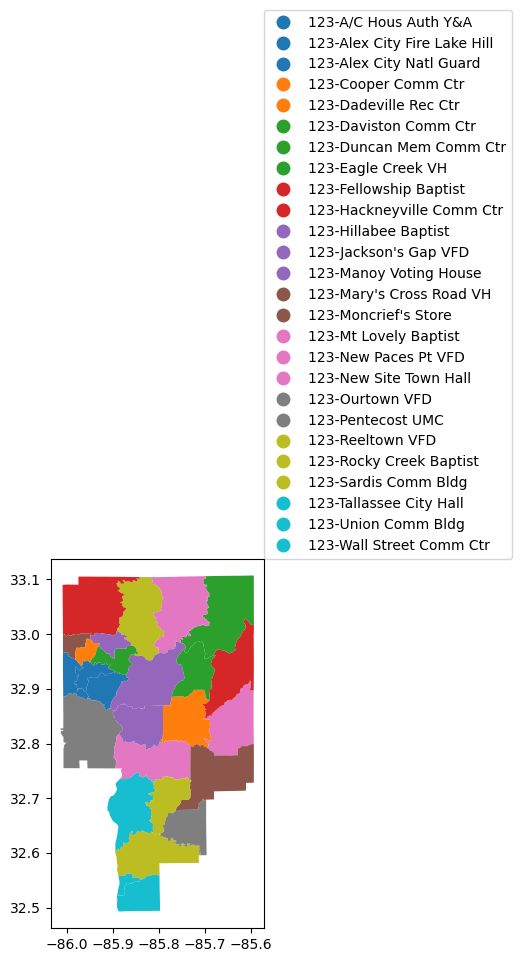

In [174]:
vest_al[vest_al["COUNTYFP20"]=="123"].plot(column = "UNIQUE_ID", legend = True, legend_kwds={"loc":(1,1)})

<AxesSubplot: >

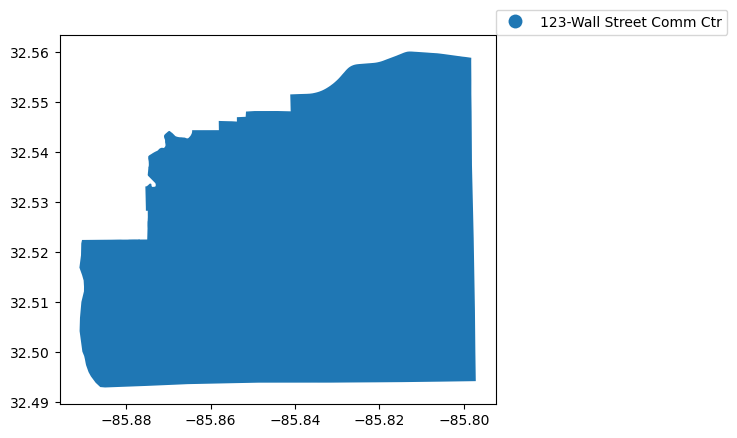

In [175]:
vest_al[vest_al["UNIQUE_ID"].isin(["123-Wall Street Comm Ctr"])].plot(column = "UNIQUE_ID", legend = True, legend_kwds={"loc":(1,1)})

In [176]:
join_after_first_step[join_after_first_step["County"]=="Tallapoosa"]

UNIQUE_ID  COUNTYFP      County  \
515  Tallapoosa-:-A/C HOU AUTH Y&A SERVICE     123.0  Tallapoosa   
516  Tallapoosa-:-ALEX CITY FIRE LAKE HILL     123.0  Tallapoosa   
517  Tallapoosa-:-ALEX CITY NATIONAL GUARD     123.0  Tallapoosa   
518           Tallapoosa-:-COOPER COMM CTR     123.0  Tallapoosa   
519        Tallapoosa-:-COUNTY CAREER TECH     123.0  Tallapoosa   
520         Tallapoosa-:-DADEVILLE REC CTR     123.0  Tallapoosa   
521         Tallapoosa-:-DAVISTON COMM CTR     123.0  Tallapoosa   
522  Tallapoosa-:-DUNCAN MEMORIAL COMM CTR     123.0  Tallapoosa   
523         Tallapoosa-:-EAGLE CREEK V_ H_     123.0  Tallapoosa   
524        Tallapoosa-:-FELLOWSHIP BAPT CH     123.0  Tallapoosa   
525     Tallapoosa-:-HACKNEYVILLE COMM CTR     123.0  Tallapoosa   
526       Tallapoosa-:-HILLABEE BAPTIST CH     123.0  Tallapoosa   
527       Tallapoosa-:-JACKSONS GAP V_F_D_     123.0  Tallapoosa   
528               Tallapoosa-:-MANOY V_ H_     123.0  Tallapoosa   
529  Tallapoosa-:-MARY'S CROSS ROADS V_ H_     123.0  Tallapoosa   
530      Tallapoosa-:-NEW PACES PT_ V_F_D_     123.0  Tallapoosa   
531        Tallapoosa-:-NEW SITE TOWN HALL     123.0  Tallapoosa   
532            Tallapoosa-:-OURTOWN V_F_D_     123.0  Tallapoosa   
533            Tallapoosa-:-PEARSON CHAPEL     123.0  Tallapoosa   
534          Tallapoosa-:-PENTECOST U_M_C_     123.0  Tallapoosa   
535       Tallapoosa-:-REELTOWN FIRE DEPT_     123.0  Tallapoosa   
536    Tallapoosa-:-ROCKY CREEK BAPTIST CH     123.0  Tallapoosa   
537      Tallapoosa-:-SARDIS COMM BUILDING     123.0  Tallapoosa   
538       Tallapoosa-:-TALLASSEE CITY HALL     123.0  Tallapoosa   
539       Tallapoosa-:-UNION COMM BUILDING     123.0  Tallapoosa   
540      Tallapoosa-:-WALL STREET COMM CTR     123.0  Tallapoosa   

                     Precinct  G22AJ5DKEL  G22AJ5RCOO  G22AJ5OWRI  G22AJ6RWIS  \
515  A/C HOU AUTH Y&A SERVICE       238.0       236.0         0.0       256.0   
516  ALEX CITY FIRE LAKE HILL        72.0       574.0         0.0       592.0   
517  ALEX CITY NATIONAL GUARD       242.0       899.0         1.0       934.0   
518           COOPER COMM CTR       532.0       313.0         0.0       345.0   
519        COUNTY CAREER TECH       359.0        70.0         0.0        90.0   
520         DADEVILLE REC CTR       362.0       564.0         1.0       590.0   
521         DAVISTON COMM CTR        26.0       170.0         0.0       167.0   
522  DUNCAN MEMORIAL COMM CTR       172.0       467.0         0.0       480.0   
523         EAGLE CREEK V_ H_        20.0       178.0         0.0       177.0   
524        FELLOWSHIP BAPT CH        12.0        87.0         0.0        86.0   
525     HACKNEYVILLE COMM CTR        25.0       510.0         1.0       513.0   
526       HILLABEE BAPTIST CH        16.0       340.0         0.0       338.0   
527       JACKSONS GAP V_F_D_       105.0       674.0         0.0       688.0   
528               MANOY V_ H_        72.0       705.0         2.0       715.0   
529  MARY'S CROSS ROADS V_ H_        86.0       112.0         0.0       114.0   
530      NEW PACES PT_ V_F_D_       145.0      1057.0         1.0      1075.0   
531        NEW SITE TOWN HALL        32.0       394.0         0.0       396.0   
532            OURTOWN V_F_D_        59.0       502.0         0.0       509.0   
533            PEARSON CHAPEL        24.0       159.0         0.0       161.0   
534          PENTECOST U_M_C_        22.0        79.0         0.0        79.0   
535       REELTOWN FIRE DEPT_        67.0       715.0         0.0       715.0   
536    ROCKY CREEK BAPTIST CH        25.0       284.0         0.0       285.0   
537      SARDIS COMM BUILDING        59.0       164.0         1.0       172.0   
538       TALLASSEE CITY HALL        60.0       338.0         0.0       356.0   
539       UNION COMM BUILDING        52.0       605.0         0.0       623.0   
540      WALL STREET COMM CTR       186.0       199.0         0.0       219.0   

     G22

<AxesSubplot: >

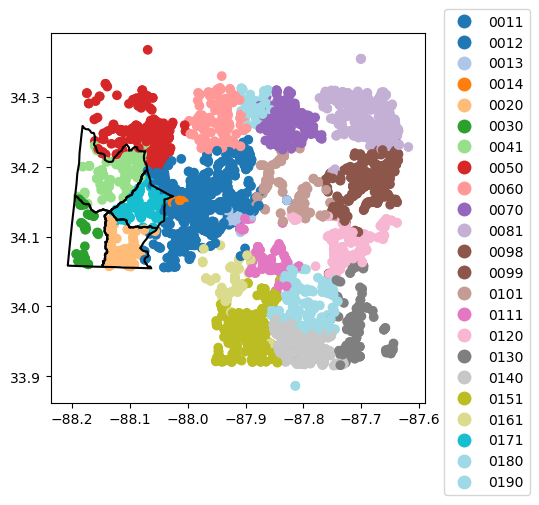

In [179]:

ax = holder[holder["co_fips"]==93].plot(column = "precinct",legend = True, cmap = "tab20", legend_kwds = {"loc":(1.05,-.25)})


vest_al[vest_al["UNIQUE_ID"].isin(['93-Barnsville Trailer',
 '93-Bexar Behind Old Post',
 '93-Kemp Pleasant Site',
 
 '93-Rye Byrd FD'])].boundary.plot(ax = ax, color = "black")

<AxesSubplot: >

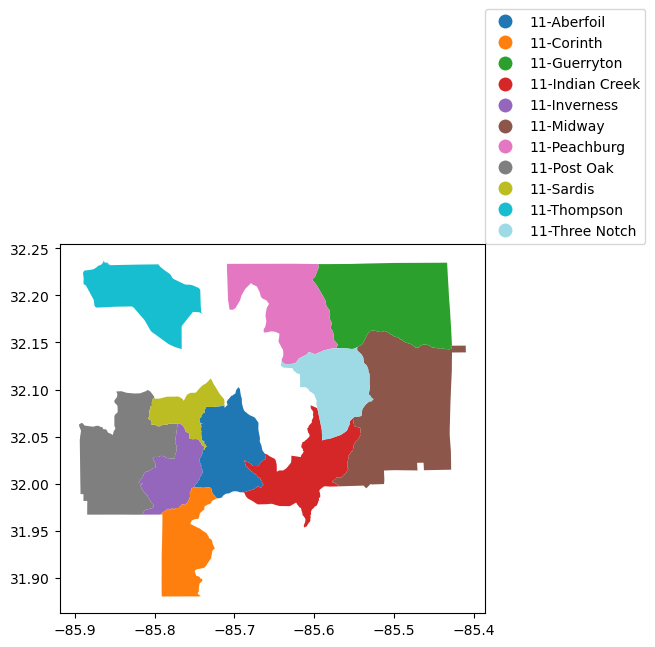

In [180]:
vest_al[vest_al["UNIQUE_ID"].isin(remaining_vest_ids)].plot(column = "UNIQUE_ID", cmap = "tab20",legend = True, legend_kwds={"loc":(1,1)})

In [181]:
# holder_joined = holder.groupby("UNIQUE_ID").sum()
# holder_joined.reset_index(inplace = True, drop = False)
# holder_joined = make_vf_points(holder_joined)

In [182]:
vest_al["Tot_Votes"] = 0

for col in ["G20PRERTRU","G20PREDBID","G20PRELJOR","G20PREOWRI"]:
    vest_al["Tot_Votes"] += vest_al[col]

In [185]:
remaining_assignments_dict

{'13-Monterey School House': Series([], Name: ELEC_22_ID, dtype: object),
 '1-East Memorial Christian Academy': Series([], Name: ELEC_22_ID, dtype: object),
 '93-Kemp Pleasant Site': '093-0030',
 '93-Pikeville Trailer': '093-0161',
 '93-Rye Byrd FD': '093-0020',
 '93-Barnsville Trailer': '093-0171',
 '31-Chestnut Grove': Series([], Name: ELEC_22_ID, dtype: object),
 '31-Victoria Baptist': Series([], Name: ELEC_22_ID, dtype: object),
 '109-Little Oak Co Bldg': Series([], Name: ELEC_22_ID, dtype: object),
 '11-Inverness': Series([], Name: ELEC_22_ID, dtype: object),
 '11-Aberfoil': Series([], Name: ELEC_22_ID, dtype: object),
 '11-Indian Creek': Series([], Name: ELEC_22_ID, dtype: object),
 '11-Post Oak': Series([], Name: ELEC_22_ID, dtype: object),
 '11-Sardis': Series([], Name: ELEC_22_ID, dtype: object),
 '11-Corinth': Series([], Name: ELEC_22_ID, dtype: object),
 '11-Midway': Series([], Name: ELEC_22_ID, dtype: object),
 '11-Guerryton': Series([], Name: ELEC_22_ID, dtype: object),
 '

13-Monterey School House
64


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


013-0112-FOREST HOME-VOTING HOUSE    19
013-0090-MANNINGHAM-VOTING HOUSE      8
Name: UNIQUE_ID_1, dtype: int64

***********************
31-Chestnut Grove
155


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


031-2-2 FRISCO VOTING HOUSE          84
031-2-3 EANON VOTING HOUSE            2
031-1-7 ZION CHAPEL SENIOR CENTER     1
Name: UNIQUE_ID_1, dtype: int64

***********************
31-Victoria Baptist
297


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


031-1-2 WISE MILL                    110
031-2-2 FRISCO VOTING HOUSE            6
031-1-7 ZION CHAPEL SENIOR CENTER      4
031-2-3 EANON VOTING HOUSE             1
Name: UNIQUE_ID_1, dtype: int64

***********************
45-Rocky Head Ft Rucker
308


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


045-0701-ROCKY HEAD COMM CENTER    55
045-0100-OZARK CIVIC CENTER         1
Name: UNIQUE_ID_1, dtype: int64

***********************
31-Unassigned
0


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


031-4-2 MT PLEASANT SENIOR CENTER    11
Name: UNIQUE_ID_1, dtype: int64

***********************
89-Cove Church at Chase
5008


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():


089-0007-CHASE PARK CHURCH OF CHRIST       3599
089-0056-MAYSVILLE CHURCH OF CHRIST          57
089-0072-LOCUST GROVE BAPTIST CHURCH         20
089-0006-HOPE VALLEY BIBLE CHURCH            15
089-0001-A & M UNIVERSITY NEW GYM             4
089-0083-MERIDIANVILLE CHURCH OF CHRIST       4
089-0005-OPTIMIST PARK                        1
089-0077-BROWNSBORO BAPTIST CHURCH            1
Name: UNIQUE_ID_1, dtype: int64


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)



***********************
91-Demopolis National Guard
1010


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


091-0102-DEMOPOLIS CIVIC CENTER II    555
091-0101-DEMOPOLIS CIVIC CENTER         4
091-0301-PROVIDENCE TOWN HALL           2
091-0201-CHURCH AFLAME                  2
Name: UNIQUE_ID_1, dtype: int64

***********************
15-Donoho School
866


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/tools/overlay.py:274: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[mask, col] = df.loc[mask, col].buffer(0)
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 32 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


015-22-01    673
015-15-02      3
Name: UNIQUE_ID_1, dtype: int64

***********************
57-Sugar Creek
94


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


057-1201-WEBSTER-WAYSIDE    64
Name: UNIQUE_ID_1, dtype: int64

***********************
57-Cole Killingsworth
156


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


057-0602-COLE PAUL HUBBERT PAVILIO    50
057-1102-BROWNS-WHITES CHAPEL         27
057-0302-ELM GROVE CHURCH             17
Name: UNIQUE_ID_1, dtype: int64

***********************
97-Grace UMC
2456


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():


097-0067-TILLMANS CORNER COMM CTR    779
097-0066-MEADOWLAKE ELEMENTARY       558
Name: UNIQUE_ID_1, dtype: int64

***********************
97-Volunteers of America
3386


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():


097-0049-REGENCY CHURCH OF CHRIST    1410
097-0048-ABBA SHRINE TEMPLE           767
Name: UNIQUE_ID_1, dtype: int64


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 32 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)



***********************
97-Whistler UMC
674


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


097-0020-HOPE CHAPEL A.M.E.Z.       228
097-0014-COLLINS RHODES ELEM        125
097-0009-DESTINATION CHURCH           3
097-0029-ROBERT L. HOPE COMM CTR      1
Name: UNIQUE_ID_1, dtype: int64

***********************
97-Apostolic Church of God
1945


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():


097-0050-DAVIDSON HIGH SCHOOL           508
097-0059-COTTAGE HILL BAPTIST CHURCH    367
Name: UNIQUE_ID_1, dtype: int64

***********************


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 33 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


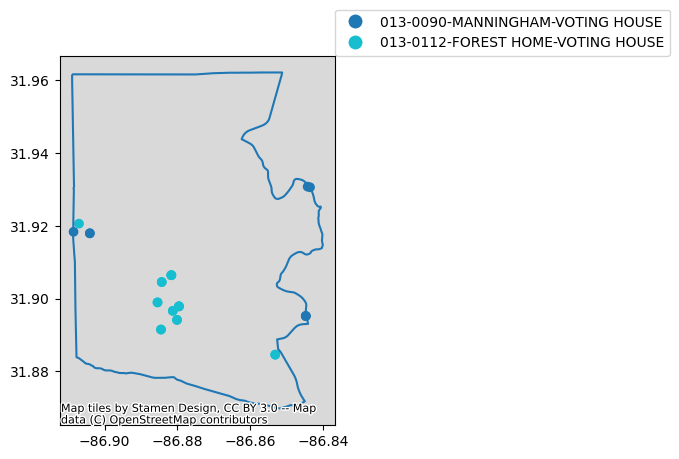

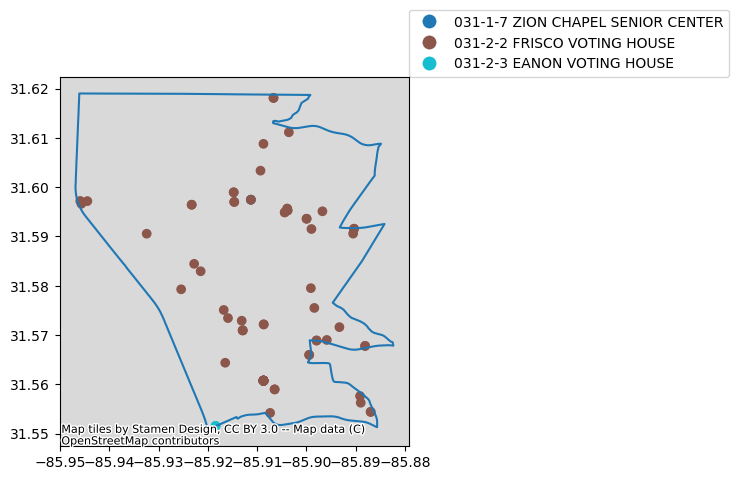

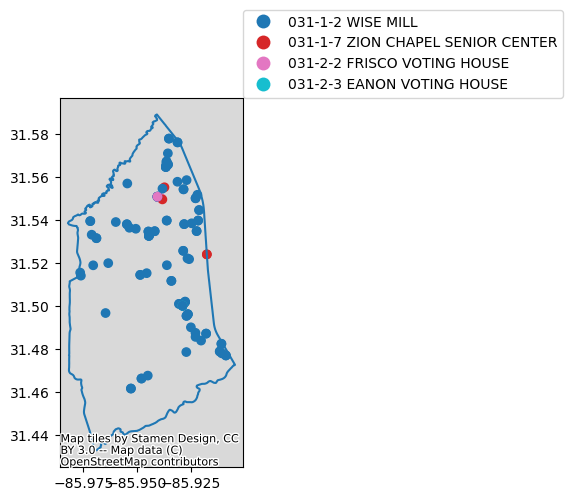

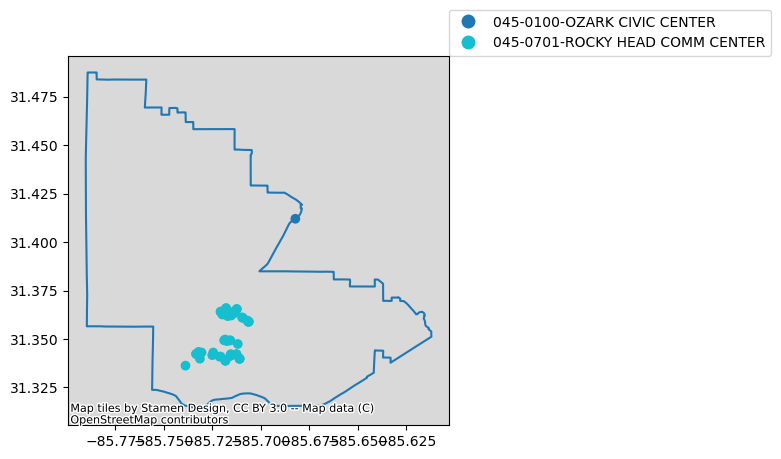

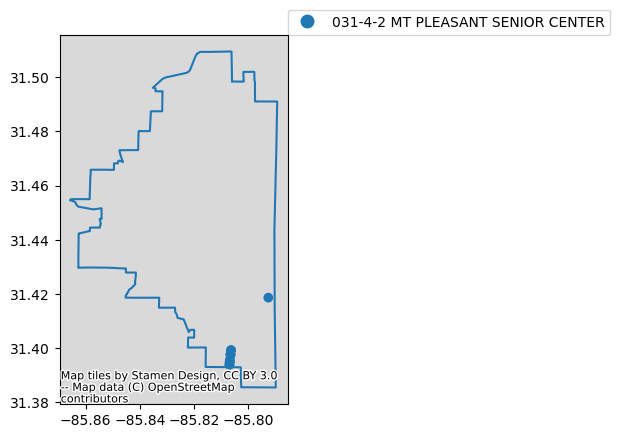

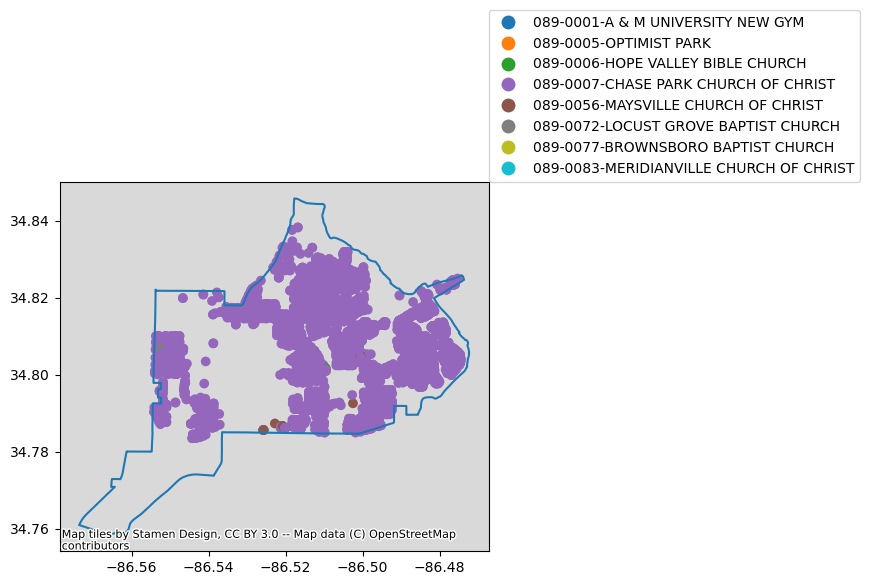

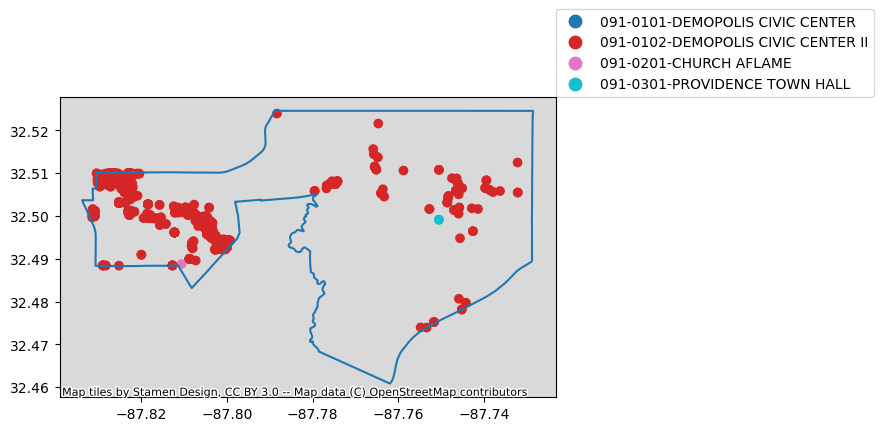

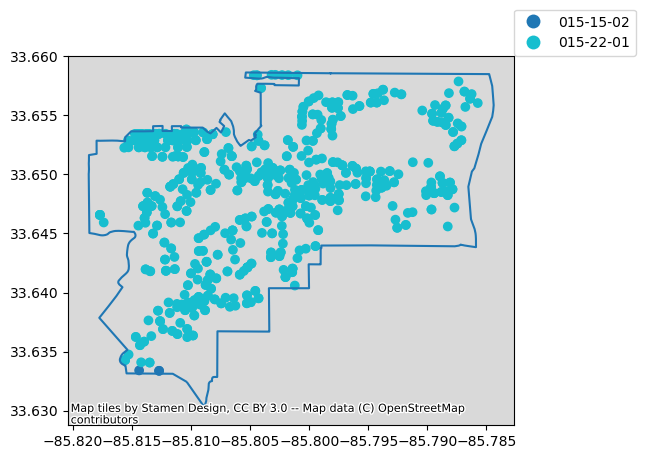

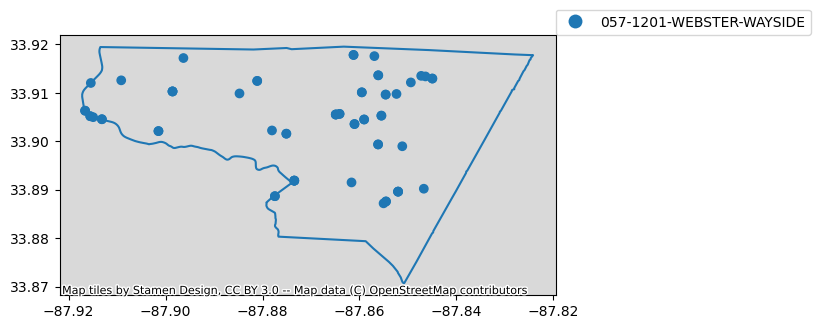

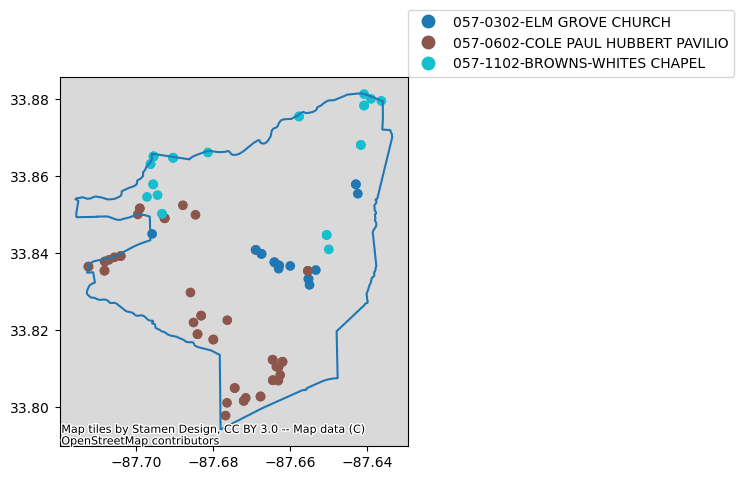

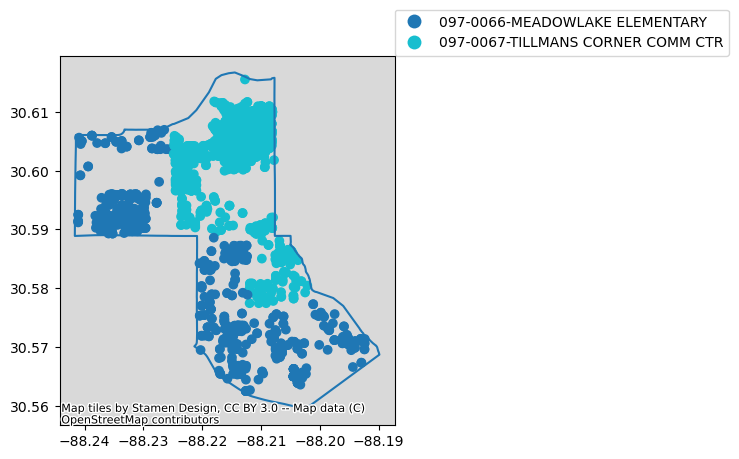

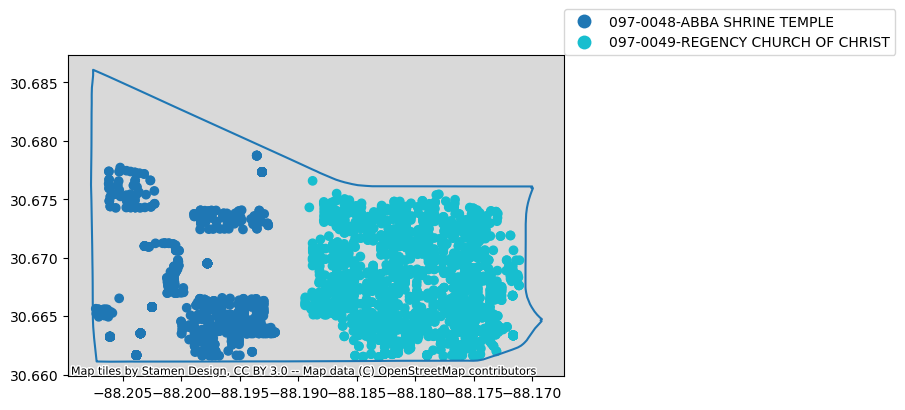

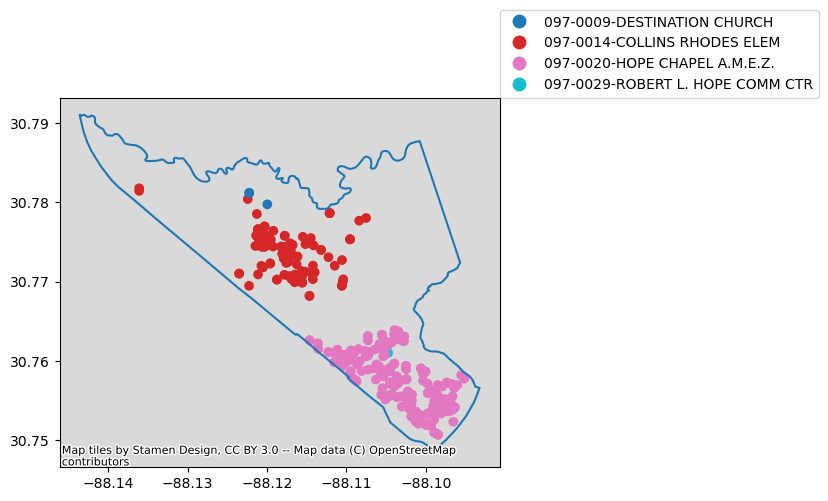

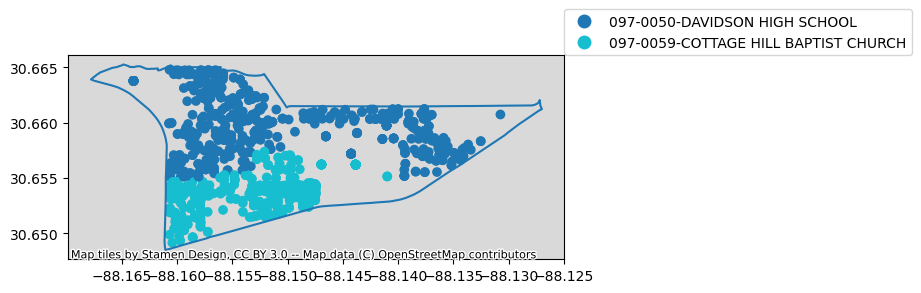

In [196]:
remaining_assignments_dict = {}

for prec in vest_unjoined:
    print(prec)
    precinct = vest_al[vest_al["UNIQUE_ID"]==prec].copy(deep = True)   
    print(precinct["Tot_Votes"].values[0])
    precinct_fip = int(precinct["COUNTYFP20"].values[0])

    intersection = gp.overlay(holder[holder["co_fips"]==precinct_fip], precinct, how = "intersection")
    print(intersection["UNIQUE_ID_1"].value_counts())
    best_match = intersection["UNIQUE_ID_1"].value_counts().index.values[0]
    
    if best_match in list(vf_correspondence["VF_ID"].unique()):
        remaining_assignments_dict[prec] = vf_correspondence.loc[vf_correspondence["VF_ID"]==best_match, "ELEC_22_ID"].values[0]
    else:
        remaining_assignments_dict[prec] = best_match
    
    ax = precinct.boundary.plot()
    intersection.plot(ax = ax, column = "UNIQUE_ID_1", legend = True, legend_kwds = {"loc":(1,1)})
    cx.add_basemap(ax = ax, source=cx.providers.Stamen.TonerLite)
    print()
    print("***********************")

In [197]:
remaining_assignments_dict

{'13-Monterey School House': 'Butler-:-FOREST HOME VTG HOUSE',
 '31-Chestnut Grove': 'Coffee-:-FRISCO VTG HOUSE',
 '31-Victoria Baptist': 'Coffee-:-WISE MILL',
 '45-Rocky Head Ft Rucker': 'Dale-:-ROCKY HD COMM_ HOUSE',
 '31-Unassigned': 'Coffee-:-MT PLEASANT SR_ CTR_',
 '89-Cove Church at Chase': 'Madison-:-CHASE PARK CH OF CHRIST',
 '91-Demopolis National Guard': 'Marengo-:-DEMOPOLIS CIVIC CTR_',
 '15-Donoho School': '015-22-01',
 '57-Sugar Creek': 'Fayette-:-WEBSTER-WAYSIDE',
 '57-Cole Killingsworth': 'Fayette-:-COLE-PAUL HUBBERT',
 '97-Grace UMC': 'Mobile-:-TILLMANS CORNER COMM_ CTR',
 '97-Volunteers of America': 'Mobile-:-REGENCY CH OF CHRIST',
 '97-Whistler UMC': 'Mobile-:-HOPE CHAPEL A_M_E_Z_',
 '97-Apostolic Church of God': 'Mobile-:-DAVIDSON HIGH SCH'}

<AxesSubplot: >

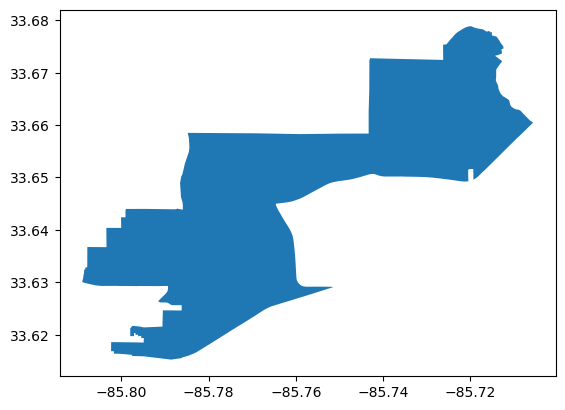

In [220]:
join_after_first_step[join_after_first_step["UNIQUE_ID"]=="Calhoun-:-ANNISTON GOLDEN SPRINGS"].plot()

<AxesSubplot: >

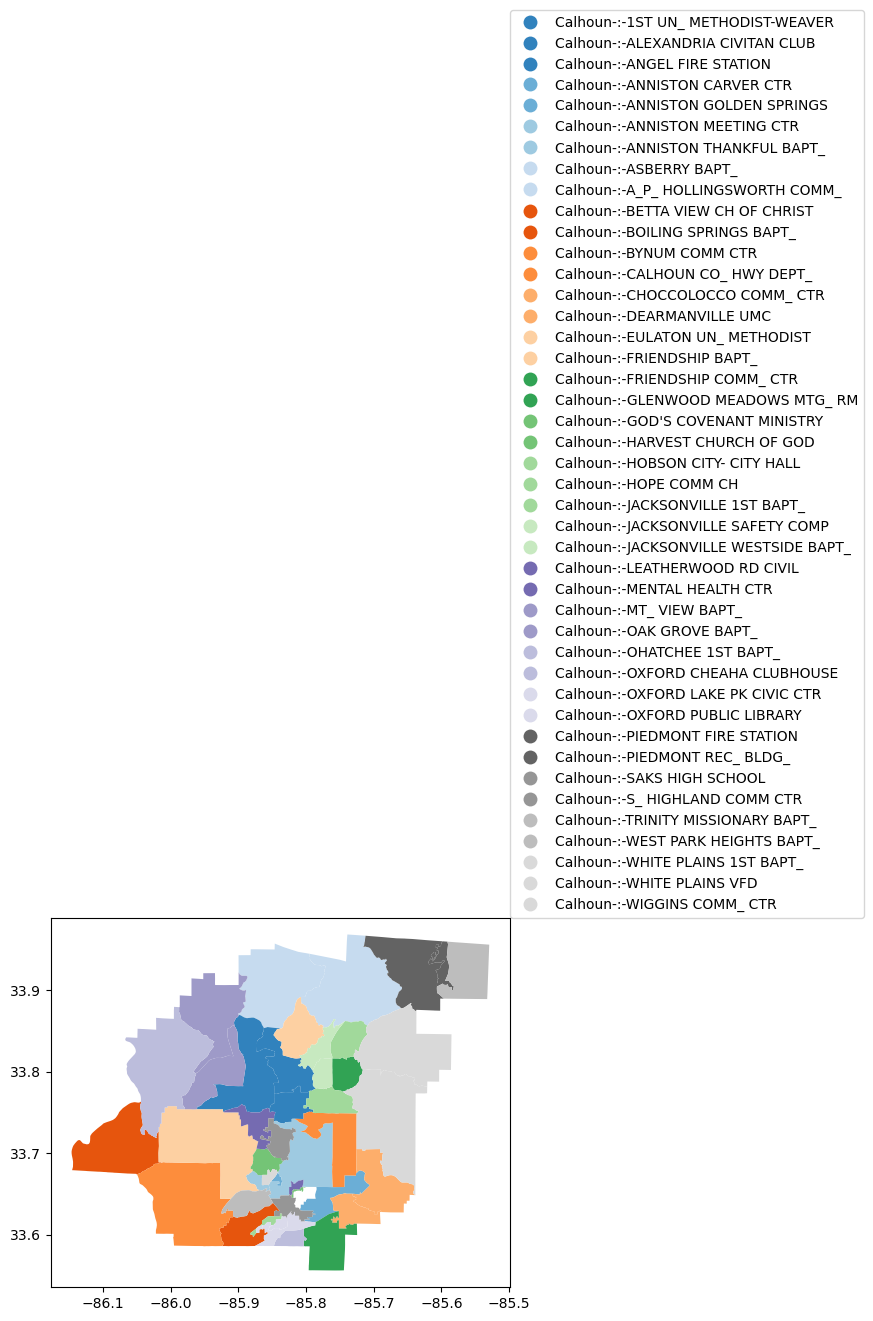

In [216]:
join_after_first_step[join_after_first_step["COUNTYFP"]==15].plot(column = "UNIQUE_ID", cmap = "tab20c",legend = True, legend_kwds = {"loc":(1,1)})

<AxesSubplot: >

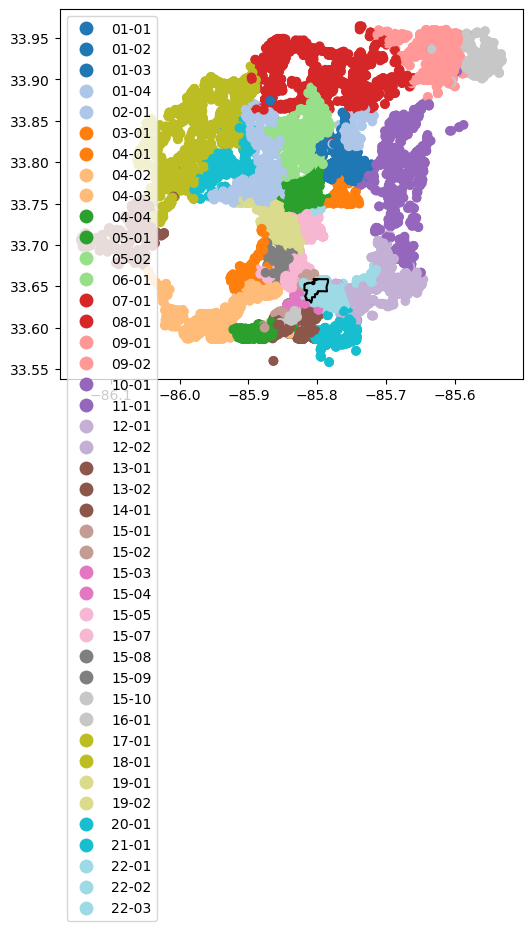

In [207]:
ax = holder[holder["co_fips"]==15].plot(column = "precinct", cmap = "tab20", legend = True)
vest_al[vest_al["UNIQUE_ID"]=='15-Donoho School'].boundary.plot(ax = ax, color = "black")